# Moscow district - EDA

This notebook contains some explorational analysis of given data in the task. 

In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
DATA_PATH = 'data'

In [3]:
user = pd.read_csv(os.path.join(DATA_PATH, 'user.csv'))
user.head()

,user_id,team_id,game_id
0,10189,1664,235
1,10018,1690,237
2,10580,1394,194
3,10600,1908,262
4,10112,1592,219


User is just a relational table, so intresting is here except we can check out number of duplicates for each column

In [4]:
for col in user.columns:
    print(user[col].value_counts())

10189    1
10898    1
10765    1
10734    1
10493    1
        ..
10578    1
10197    1
10130    1
10396    1
10471    1
Name: user_id, Length: 973, dtype: int64
1592    7
1848    6
1474    6
1784    6
1720    6
       ..
1458    1
1658    1
1804    1
1914    1
1430    1
Name: team_id, Length: 214, dtype: int64
242    32
206    32
219    32
249    32
210    32
264    30
243    30
239    30
184    30
241    29
237    29
205    29
211    28
235    27
247    27
248    27
183    27
244    26
209    26
238    26
236    25
245    24
192    23
190    22
215    22
214    22
234    22
251    21
204    20
262    20
213    20
252    19
231    19
246    17
201    15
193    15
202    14
218    10
182    10
194    10
191    10
195     7
233     5
Name: game_id, dtype: int64


User is unique for each row, but teams and games the situiation is different - many users participated in one game and team, which is obvious.

In [5]:
user_decision = pd.read_csv(os.path.join(DATA_PATH, 'user_decision.csv'))
user_decision.head(), user_decision.shape

(   user_id  period  decision_id
 0    10625       1          409
 1    10318       3          203
 2    10775       4          420
 3    10236       2          284
 4    10130       3           72,
 (60228, 3))

Compared to the amount of users, number of total decisions is quite large and thus this might be a discriminative vector which separates and describes users.


In [6]:
for col in user_decision.columns:
    print(user_decision[col].value_counts())

10333    428
10942    377
10667    357
10242    335
10804    330
        ... 
10861      1
10387      1
10622      1
10354      1
10906      1
Name: user_id, Length: 973, dtype: int64
3    20964
4    14811
2    14453
1    10000
Name: period, dtype: int64
386    1336
25      863
27      830
26      818
276     768
       ... 
7         4
233       3
346       2
261       1
258       1
Name: decision_id, Length: 343, dtype: int64


Unfortunately we face users with only one decision in the whole dataset - those will be hard to separate. 

Period is somewhat evenly distributed with no great difference in different stages of the game

Amount of given decisions is 350 and this is a lot for given number of users. Think unification of those will be a good idea.

In [7]:
decision = pd.read_excel(os.path.join(DATA_PATH, 'decision.xlsx'))
decision.head()

,decision_id,decision_name,Unnamed: 2
0,1,Dividend payout in cash,NaN
1,2,Dividend payout in stocks,NaN
2,3,Zero dividend policy,NaN
3,4,The distribution of the residue after the rein...,NaN
4,5,Fixed size of dividend payouts sum,NaN


Seems that decisions are related to some financial business game 

In [8]:
decision.decision_id.value_counts()

1      1
289    1
300    1
299    1
298    1
      ..
143    1
142    1
141    1
140    1
438    1
Name: decision_id, Length: 437, dtype: int64

No duplication and also we can conclude that about 100 decision are not presented in our training set, so we will not bother with those

In [20]:
user_decision.merge(decision, on = 'decision_id', how = 'left').decision_name.value_counts().iloc[:50]

Setting the base selling price                                    1336
Create a team                                                      863
Pick of contractors and providers                                  830
Methodology of project management                                  818
Quantity of work shifts                                            768
Increase in energy efficiency of equipment                         653
Development of productionвЂ™s optimisation                         627
Stepwise staff numerosityвЂ™s revisions                            617
Development of wasteless production                                544
Applying for a tender                                              479
Enguneers salary                                                   477
Development of repair regulations                                  475
R&D enhancement of aesthetic and ergonomic qualities Standard+     450
Fabrication staff salaty                                           447
Manage

I am not a great in finances, so i would propose that some of those decisions might be unified using given names

In [10]:
train = pd.read_csv(os.path.join(DATA_PATH, 'train.csv'))
train.head()

,id,Analytical thinking,Systemic thinking,Adaptability,Focus
0,10884,4.0,4.0,4.0,4.0
1,10106,5.0,4.0,5.0,5.0
2,10438,6.0,5.0,5.0,5.0
3,10130,5.0,4.0,5.0,5.0
4,10667,4.0,5.0,5.0,5.0


We have 4 variables to predict for each user

In [11]:
for col in train.columns[1:]:
    print(train[col].value_counts())

4.0    417
5.0    209
3.0     36
6.0     14
1.0      4
Name: Analytical thinking, dtype: int64
4.0    491
5.0    124
3.0     51
6.0     10
1.0      4
Name: Systemic thinking, dtype: int64
5.0    318
4.0    308
3.0     36
6.0     15
1.0      2
2.0      1
Name: Adaptability, dtype: int64
4.0    400
5.0    244
3.0     29
6.0      3
1.0      3
2.0      1
Name: Focus, dtype: int64


The data is highly unbalanced with most of them presented in range 4 - 5, for Focus the situation even harder, since category 2.0 is presented only once

In [12]:
sample = pd.read_csv(os.path.join(DATA_PATH, 'sample_solution.csv'))
sample.head(), sample.shape

(      id  Analytical thinking  Systemic thinking  Adaptability  Focus
 0  10199                    0                  0             0      0
 1  10539                    0                  0             0      0
 2  10174                    0                  0             0      0
 3  10465                    0                  0             0      0
 4  10066                    0                  0             0      0,
 (293, 5))

About 30% of data was splitted for test dataset

# Team influence

Lets unify some of the sets and take look at correlation for team points and target variable

In [13]:
train = train.rename(columns = {'id': 'user_id'})
user = user.merge(train, on = 'user_id', how = 'right')
team_point = pd.read_csv(os.path.join(DATA_PATH, 'team_point.csv'))
team_point = team_point.groupby(['team_id']).mean().loc[:, ['score', 'place']].reset_index(level = 0)
user = user.merge(team_point, on = 'team_id', how = 'left')

In [14]:
user.drop(['user_id', 'team_id', 'game_id'], axis = 1)

,Analytical thinking,Systemic thinking,Adaptability,Focus,score,place
0,4.0,4.0,4.0,4.0,39.600000,4.166667
1,5.0,4.0,5.0,5.0,60.933333,2.800000
2,6.0,5.0,5.0,5.0,53.466667,2.733333
3,5.0,4.0,5.0,5.0,44.466667,3.466667
4,4.0,5.0,5.0,5.0,58.533333,3.400000
...,...,...,...,...,...,...
675,5.0,4.0,5.0,4.0,35.733333,4.400000
676,5.0,4.0,5.0,5.0,55.466667,3.066667
677,5.0,4.0,5.0,4.0,48.866667,2.766667
678,4.0,4.0,4.0,4.0,56.133333,2.600000


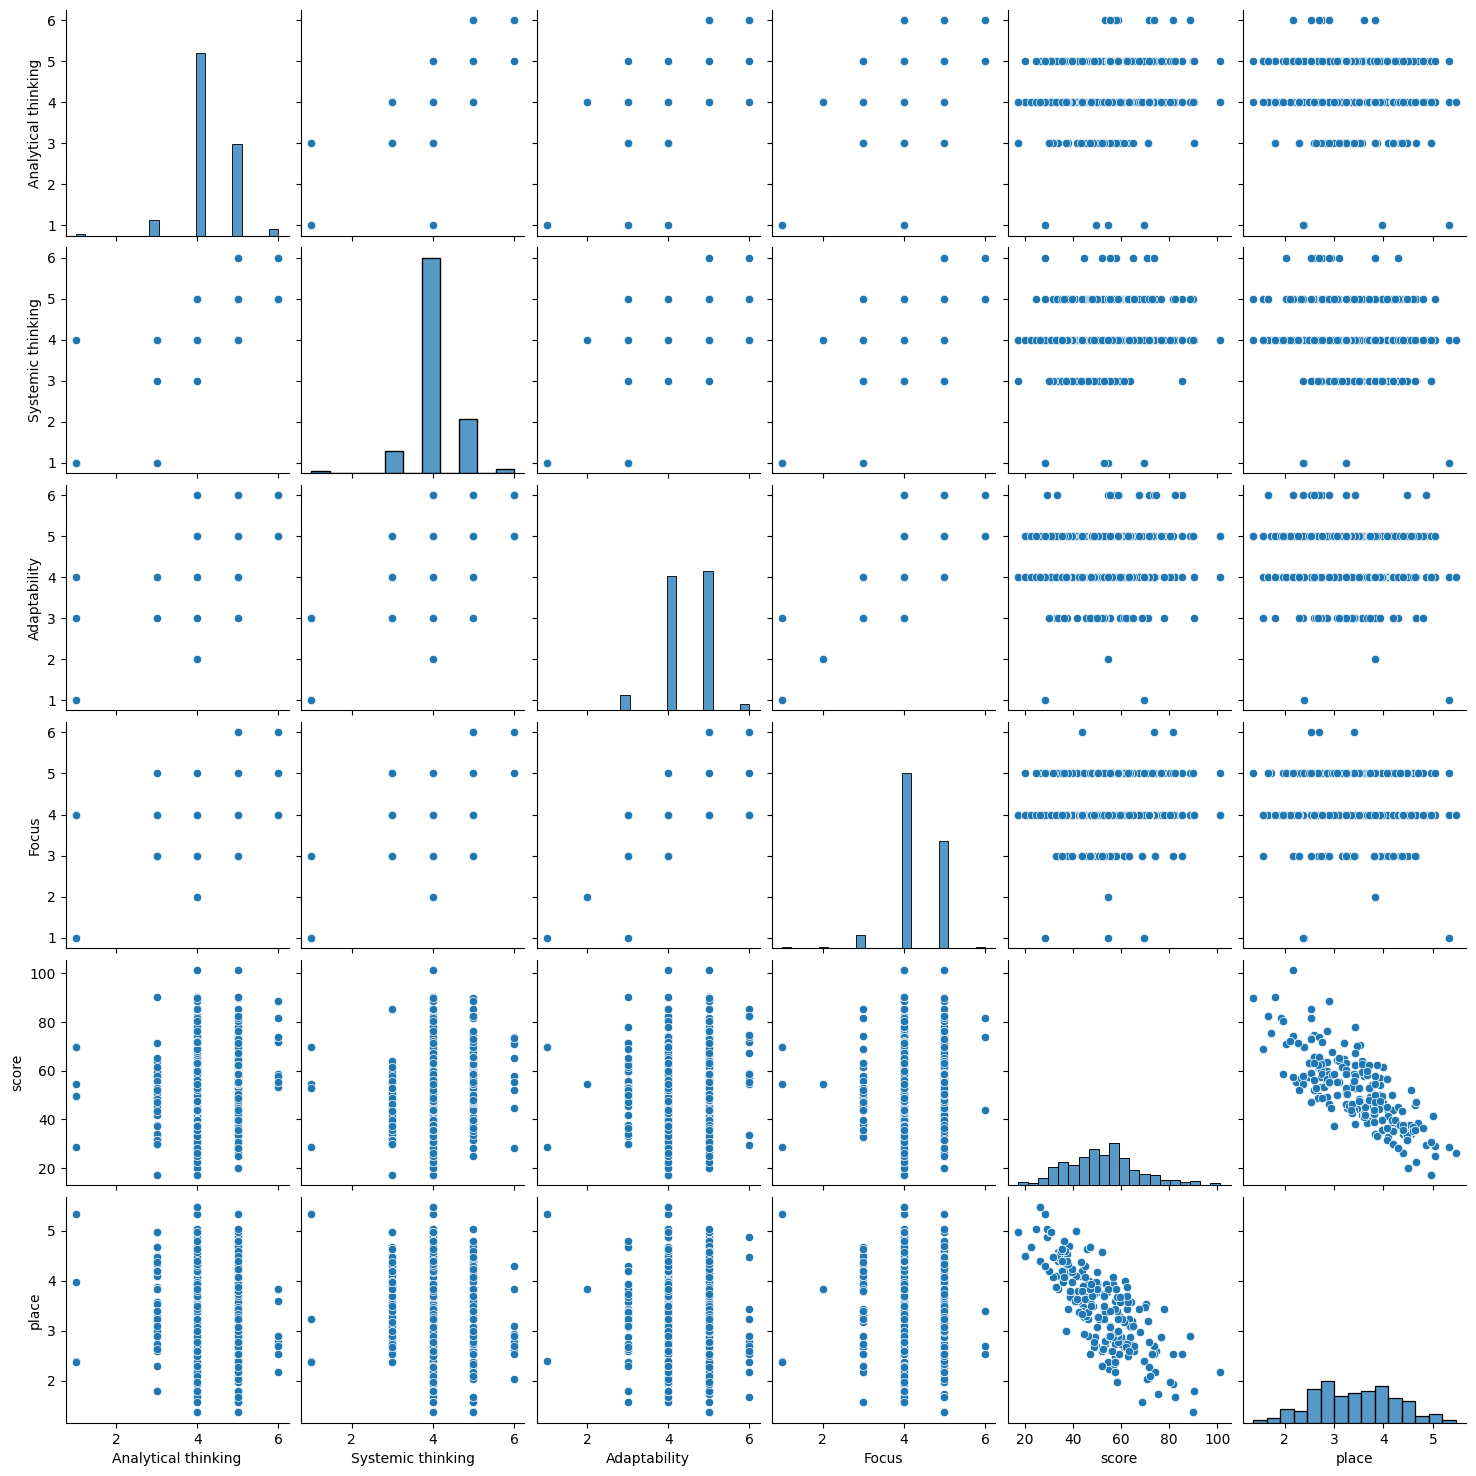

In [15]:
sns.pairplot(user.drop(['user_id', 'team_id', 'game_id'], axis = 1))

Scores and place are correlated, using linear model i would chose only one of those. Quite strange that score-place results are not on a straight line - probably some other factors were inlcuded in the final analysis of user's place

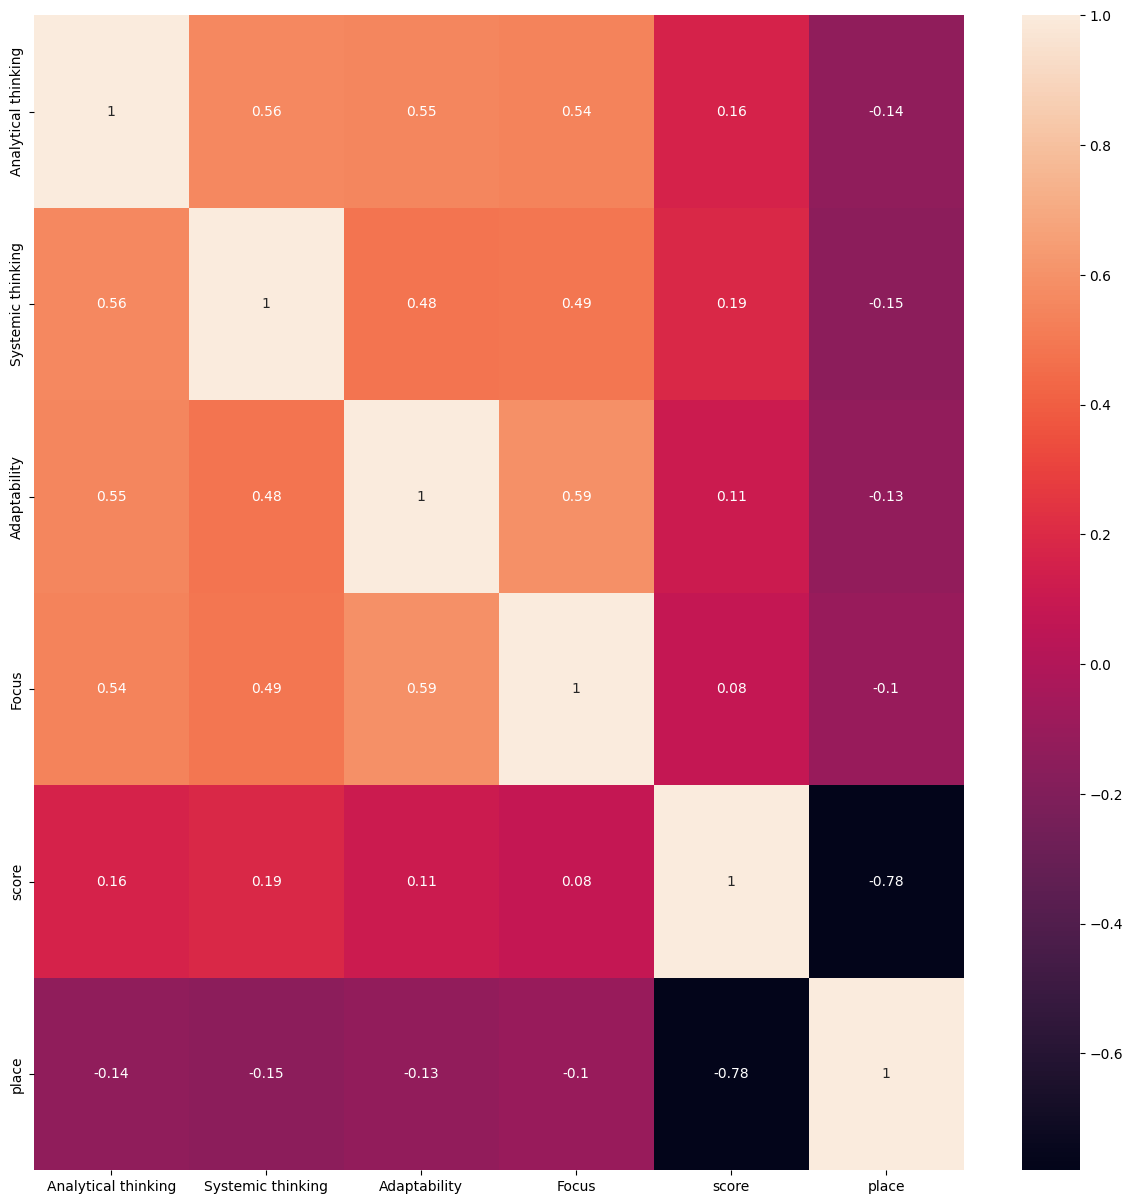

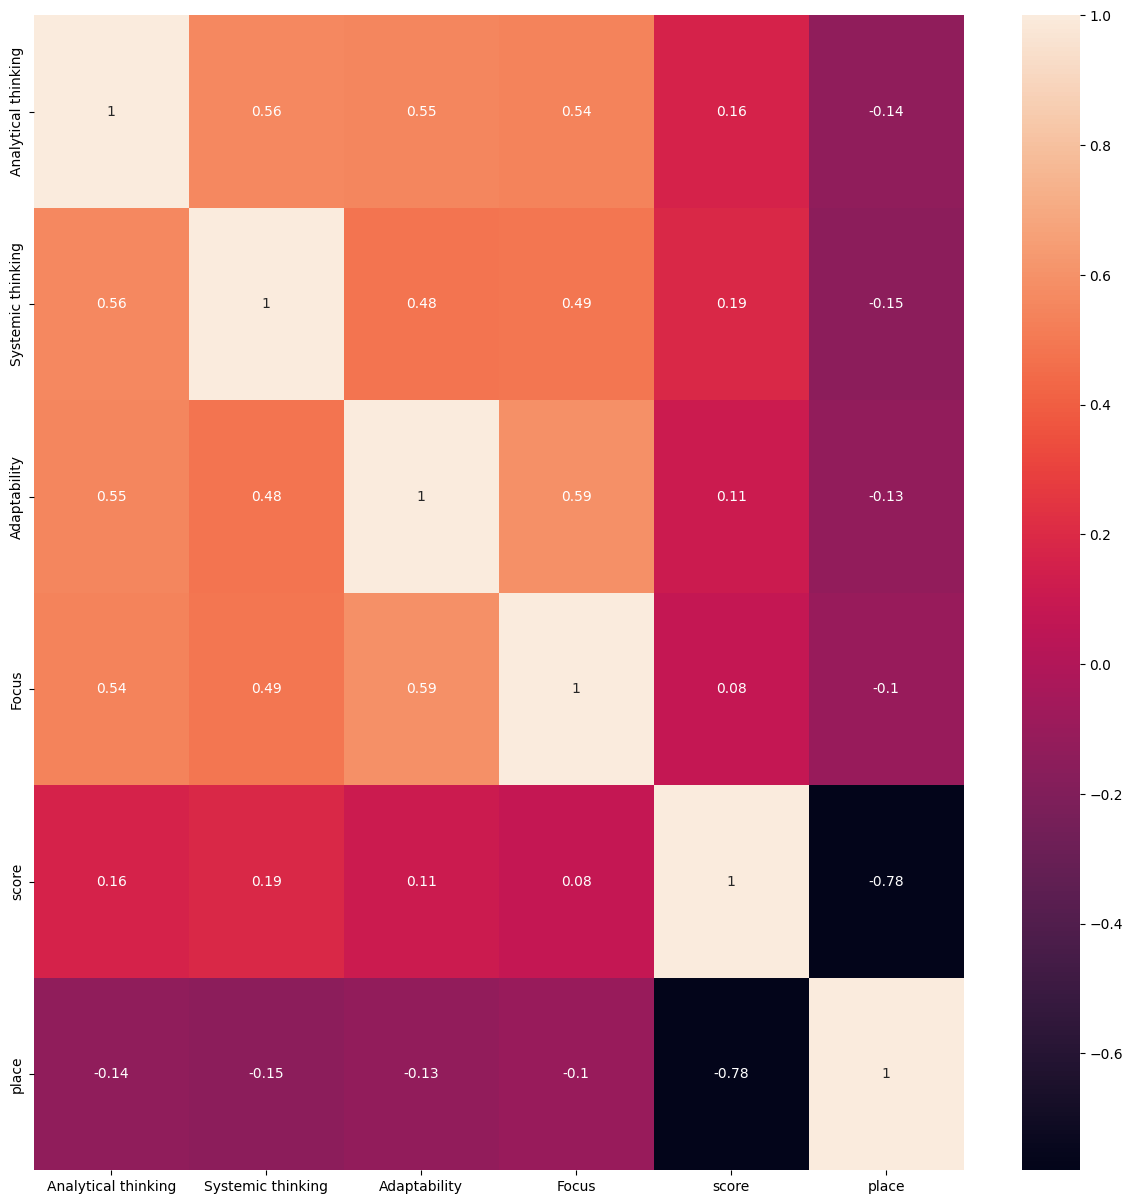

In [19]:
plt.figure(figsize = (15, 15))
sns.heatmap(user.drop(['user_id', 'team_id', 'game_id'], axis = 1).corr().round(2), annot = True)
plt.show()

Target variables are highly correlated. Hope that it will be possible to use that fact and user those variables of teammates to predict final user score